In [1]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import time

In [3]:
DATADIR = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/CellData/chest_xray/train'
CATEGORIES = ['NORMAL', 'PNEUMONIA']

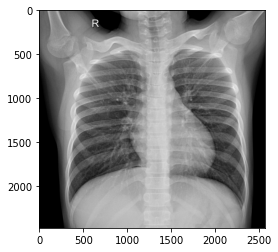

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [5]:
training_data = []
def create_training_data():
    for i in range(len(CATEGORIES)):
        category = CATEGORIES[i]
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            training_data.append([img_array, i])

In [6]:
count_pneumonia = 0
count_normal = 0 
for image in training_data:
    if image[1] == 0:
        count_pneumonia += 1
    else:
         count_normal +=1
print('Pneumonia:', count_pneumonia, 'Normal:', count_normal)

Pneumonia: 0 Normal: 0


In [7]:
import random
random.shuffle(training_data)

In [8]:
X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

NameError: name 'IMG_SIZE' is not defined

In [ ]:
y = np.array(y)
X = X/225.0
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #rectified linear
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.2)

# From Notes

In [10]:
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        DATADIR, 
        target_size=(224, 224), 
        batch_size = 5232, 
        seed = 123) 

Found 5232 images belonging to 2 classes.
